<a href="https://colab.research.google.com/github/BrahmaTeja7/Dissertation_DBS/blob/main/Fake_News_Prediction_using_Count_Vectorizer_10Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [1]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score, precision_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from scipy.stats import uniform, randint,expon
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading the Dataset using Pandas Library**

In [2]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [3]:
dataset.shape

(44867, 5)

### **Shuffling the dataset row set records**

In [4]:
shuffled_dataset = dataset.sample(frac=1.0)
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [5]:
shuffled_dataset['label'] = np.where(shuffled_dataset['marker'] == True, 0, 1)
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

**Converting the text to lowercase**

In [6]:
shuffled_dataset['processing_text'] = shuffled_dataset['text'].str.lower()
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

**Removing the Punctuations in the text**

In [7]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [8]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

**Removing the stopwords in text column**

In [9]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [10]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

**Removing the special Characters, Html tags, Url in text column**

In [11]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [12]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text
43901,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...,worldnews,11-Sep-17,True,0,seoul reuters south korean foreign minister ka...
526,Bannon Takes His ‘Weapons’ At Breitbart; Smea...,This week s chaotic news cycle was mostly domi...,News,20-Aug-17,False,1,week chaotic news cycle mostly dominated donal...
38116,Lebanon's Hariri can come to France when he wa...,RIYADH (Reuters) - France is working to normal...,worldnews,16-Nov-17,True,0,riyadh reuters france working normalize situat...
37302,Thirty-one bodies recovered after migrant boat...,TRIPOLI (Reuters) - At least 31 migrants died ...,worldnews,25-Nov-17,True,0,tripoli reuters least 31 migrants died boat sa...
7557,Trump Rally Nearly Turns Into A Full-Blown Ra...,Tensions ran high outside of a campaign rally ...,News,11-Mar-16,False,1,tensions ran high outside campaign rally donal...


In [13]:
from collections import Counter
word_count = Counter()
for text in shuffled_dataset['processing_text']:
  for word in text.split():
    word_count[word]+= 1

word_count.most_common(1000)

[('said', 129916),
 ('trump', 127445),
 ('us', 62760),
 ('s', 54953),
 ('would', 54736),
 ('president', 51795),
 ('people', 41065),
 ('one', 35213),
 ('state', 31967),
 ('also', 30851),
 ('new', 30677),
 ('reuters', 28764),
 ('donald', 27496),
 ('clinton', 27189),
 ('house', 27013),
 ('obama', 26905),
 ('government', 26657),
 ('states', 25935),
 ('republican', 24293),
 ('could', 23774),
 ('united', 23394),
 ('told', 23317),
 ('white', 22124),
 ('like', 21947),
 ('campaign', 21041),
 ('last', 20369),
 ('news', 19830),
 ('two', 19828),
 ('party', 19750),
 ('time', 19453),
 ('election', 19355),
 ('first', 18420),
 ('washington', 17706),
 ('former', 17572),
 ('year', 17451),
 ('even', 17424),
 ('country', 17404),
 ('many', 16227),
 ('hillary', 16134),
 ('years', 15878),
 ('security', 15545),
 ('may', 15343),
 ('say', 15179),
 ('national', 15123),
 ('political', 14975),
 ('made', 14825),
 ('media', 14820),
 ('get', 14680),
 ('law', 14628),
 ('police', 14505),
 ('make', 14489),
 ('court', 14

In [14]:
Rare_words = set(word for (word, wc) in word_count.most_common()[:-100:-1])
Rare_words

{'20012005',
 '2017calls',
 '75738',
 'abeand',
 'aboubakar',
 'adeeb',
 'afrah',
 'alabamaday',
 'alabamanew',
 'allredgloria',
 'allreds',
 'argentinawhen',
 'belowroy',
 'belyeu',
 'berhonda',
 'branchburg',
 'bridgecruz',
 'buildawall',
 'celebrant',
 'ceremonyspeaking',
 'childrenturkey',
 'churchillrepublicans',
 'churchsponsored',
 'coalfields',
 'coldchapman',
 'compiler',
 'conflates',
 'controversyhere',
 'counteracts',
 'countriesat',
 'crema',
 'custodianship',
 'cutesie',
 'defrocking',
 'dictatorsever',
 'directories',
 'donaldwednesday',
 'dramaticallyperhaps',
 'drugsgovernments',
 'examinationalsen',
 'fermans',
 'fouryearterm',
 'gerrard',
 'governmentsfeatured',
 'gussie',
 'harissou',
 'himsellers',
 'homenoticing',
 'httpstcosyt7ccimwp',
 'httpswwwyoutubecomwatchvygnwlpazjpm',
 'iansams',
 'immigrantsfirst',
 'immigrationonce',
 'irishborn',
 'jessmc',
 'jiarui',
 'kahiye',
 'kenyi',
 'korteweg',
 'lelania',
 'loburon',
 'longsilent',
 'madeif',
 'makati',
 'monoth

**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [15]:
port_stemming = PorterStemmer()

In [16]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [17]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['processing_text'].apply(lambda x: stemming(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
43901,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...,worldnews,11-Sep-17,True,0,seoul reuters south korean foreign minister ka...,seoul reuter south korean foreign minist kang ...
526,Bannon Takes His ‘Weapons’ At Breitbart; Smea...,This week s chaotic news cycle was mostly domi...,News,20-Aug-17,False,1,week chaotic news cycle mostly dominated donal...,week chaotic news cycl mostli domin donald tru...
38116,Lebanon's Hariri can come to France when he wa...,RIYADH (Reuters) - France is working to normal...,worldnews,16-Nov-17,True,0,riyadh reuters france working normalize situat...,riyadh reuter franc work normal situat lebanon...
37302,Thirty-one bodies recovered after migrant boat...,TRIPOLI (Reuters) - At least 31 migrants died ...,worldnews,25-Nov-17,True,0,tripoli reuters least 31 migrants died boat sa...,tripoli reuter least 31 migrant die boat sank ...
7557,Trump Rally Nearly Turns Into A Full-Blown Ra...,Tensions ran high outside of a campaign rally ...,News,11-Mar-16,False,1,tensions ran high outside campaign rally donal...,tension ran high outsid campaign ralli donald ...





**Tokenizing the words in the text column**

In [18]:
def token(text):
  return word_tokenize(text)

In [19]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: token(x))
print(shuffled_dataset)

                                                   title  \
43901  South Korean foreign minister says North Korea...   
526     Bannon Takes His ‘Weapons’ At Breitbart; Smea...   
38116  Lebanon's Hariri can come to France when he wa...   
37302  Thirty-one bodies recovered after migrant boat...   
7557    Trump Rally Nearly Turns Into A Full-Blown Ra...   
...                                                  ...   
7324    Jimmy Kimmel Compares Trump And Cruz and The ...   
37100  Turkey suggests plan to extend military missio...   
27003  Trump directly scolds NATO allies, says they o...   
14550  TOP NAVY COMMANDER RELEASED After Reportedly R...   
27332  Former Trump security aide was Russia blackmai...   

                                                    text       subject  \
43901  SEOUL (Reuters) - South Korean Foreign Ministe...     worldnews   
526    This week s chaotic news cycle was mostly domi...          News   
38116  RIYADH (Reuters) - France is working to normal... 

**Removing unused columns from the dataset**





In [20]:
shuffled_dataset = shuffled_dataset.drop(['date','marker'],axis=1)
shuffled_dataset

,title,text,subject,label,processing_text,stemmed_text
43901,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...,worldnews,0,seoul reuters south korean foreign minister ka...,"[seoul, reuter, south, korean, foreign, minist..."
526,Bannon Takes His ‘Weapons’ At Breitbart; Smea...,This week s chaotic news cycle was mostly domi...,News,1,week chaotic news cycle mostly dominated donal...,"[week, chaotic, news, cycl, mostli, domin, don..."
38116,Lebanon's Hariri can come to France when he wa...,RIYADH (Reuters) - France is working to normal...,worldnews,0,riyadh reuters france working normalize situat...,"[riyadh, reuter, franc, work, normal, situat, ..."
37302,Thirty-one bodies recovered after migrant boat...,TRIPOLI (Reuters) - At least 31 migrants died ...,worldnews,0,tripoli reuters least 31 migrants died boat sa...,"[tripoli, reuter, least, 31, migrant, die, boa..."
7557,Trump Rally Nearly Turns Into A Full-Blown Ra...,Tensions ran high outside of a campaign rally ...,News,1,tensions ran high outside campaign rally donal...,"[tension, ran, high, outsid, campaign, ralli, ..."
...,...,...,...,...,...,...
7324,Jimmy Kimmel Compares Trump And Cruz and The ...,While many Republicans are lining up behind Te...,News,1,many republicans lining behind ted cruz say tr...,"[mani, republican, line, behind, ted, cruz, sa..."
37100,Turkey suggests plan to extend military missio...,ISTANBUL (Reuters) - Turkey said on Tuesday it...,worldnews,0,istanbul reuters turkey said tuesday could exp...,"[istanbul, reuter, turkey, said, tuesday, coul..."
27003,"Trump directly scolds NATO allies, says they o...",BRUSSELS (Reuters) - U.S. President Donald Tru...,politicsNews,0,brussels reuters us president donald trump thu...,"[brussel, reuter, us, presid, donald, trump, t..."
14550,TOP NAVY COMMANDER RELEASED After Reportedly R...,"Seven years ago, this story would ve seemed li...",politics,1,seven years ago story would seemed like someth...,"[seven, year, ago, stori, would, seem, like, s..."


**Creating Train and Test split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.text, shuffled_dataset.label, test_size=0.25)

In [22]:
print('X_train:', X_train.shape,
      'X_test:', X_test.shape,
      'y_train:', y_train.shape,
      'y_test:', y_test.shape)


X_train: (33650,) X_test: (11217,) y_train: (33650,) y_test: (11217,)


**Applying CountVectorizer**

In [23]:
bag_of_words = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [24]:
X_train_bow = bag_of_words.fit_transform(X_train.values)
#y_train = shuffled_dataset.label

In [25]:
X_train_bow

<33650x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 7897729 stored elements in Compressed Sparse Row format>

**Creating Vocabulary to store the words**

In [26]:
bow_vocabulary = bag_of_words.vocabulary_

In [27]:
print(bow_vocabulary)

{'reuters': 3392, 'over': 2912, 'judicial': 2182, 'changes': 762, 'in': 1886, 'broke': 633, 'out': 2896, 'on': 2803, 'thursday': 4337, 'with': 4892, 'prosecutors': 3165, 'and': 252, 'the': 3974, 'political': 3046, 'opposition': 2870, 'warning': 4716, 'that': 3922, 'proposed': 3163, 'to': 4353, 'criminal': 992, 'code': 845, 'would': 4941, 'fight': 1399, 'against': 159, 'corruption': 956, 'other': 2887, 'crimes': 991, 'parliamentary': 2940, 'commission': 867, 'will': 4868, 'start': 3751, 'next': 2626, 'monday': 2530, 'debate': 1041, 'which': 4833, 'have': 1688, 'been': 538, 'introduced': 2044, 'by': 668, 'ruling': 3440, 'social': 3681, 'democrats': 1081, 'under': 4588, 'proposals': 3162, 'tell': 3894, 'potential': 3068, 'suspects': 3853, 'they': 4275, 'are': 358, 'about': 71, 'be': 512, 'investigated': 2046, 'of': 2704, 'evidence': 1317, 'can': 696, 'use': 4629, 'prove': 3175, 'cases': 725, 'temporary': 3898, '30': 49, 'day': 1026, 'arrest': 383, 'much': 2558, 'used': 4632, 'police': 303

In [28]:
print(X_train_bow[15].toarray())

[[0 0 0 ... 0 0 0]]


# **Initializing the selected Machine learning models**

In [29]:
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = xgb.XGBClassifier()

# **Defining Hyperparameters for selected Machine learning algorithms**

In [30]:
svm_param_distributions = {'C': uniform(0.7, 1), 'kernel': ['linear']}
nb_param_distributions = {'alpha': uniform(0.5, 10)}
xgb_param_distributions = {'n_estimators': randint(50, 100), 'max_depth': randint(3, 8)}

In [31]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# **Multinomial Naive Bayes**

In [32]:
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=nb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [33]:
start_time_MNB_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_MNB_training = time.time()
elapsed_time_MNB_training = end_time_MNB_training - start_time_MNB_training


Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [34]:
print(f"Time taken: {elapsed_time_MNB_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 3.5027124881744385 seconds
Best Parameters:  {'alpha': 0.5011437481734489}
Best Accuracy:  0.9597919762258543


In [35]:
start_time_MNB_testing = time.time()


X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Multinomial Naive Bayes :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_MNB_testing = time.time()
elapsed_time_MNB_testing = end_time_MNB_testing - start_time_MNB_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_MNB_testing} seconds")

Accuracy score for Multinomial Naive Bayes : 0.9597040206828921

******************************************************

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5378
           1       0.97      0.95      0.96      5839

    accuracy                           0.96     11217
   macro avg       0.96      0.96      0.96     11217
weighted avg       0.96      0.96      0.96     11217


******************************************************

Time taken: 11.424771547317505 seconds


Confusion Matrix:
[[5226  152]
 [ 300 5539]]


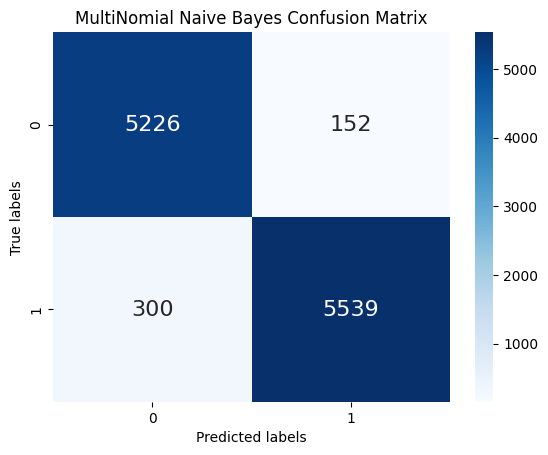

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('MultiNomial Naive Bayes Confusion Matrix')

# Display the plot
plt.show()

In [37]:
print(X_test_bow)

  (0, 252)	2
  (0, 298)	1
  (0, 358)	2
  (0, 361)	1
  (0, 362)	1
  (0, 364)	1
  (0, 430)	2
  (0, 438)	2
  (0, 442)	1
  (0, 854)	1
  (0, 855)	1
  (0, 1081)	1
  (0, 1174)	1
  (0, 1175)	1
  (0, 1179)	1
  (0, 1231)	1
  (0, 1232)	1
  (0, 1357)	1
  (0, 1585)	4
  (0, 1587)	4
  (0, 1702)	2
  (0, 1716)	1
  (0, 1721)	1
  (0, 1819)	1
  (0, 1886)	2
  :	:
  (11216, 4751)	4
  (11216, 4758)	1
  (11216, 4763)	1
  (11216, 4772)	1
  (11216, 4780)	1
  (11216, 4782)	1
  (11216, 4803)	1
  (11216, 4814)	1
  (11216, 4821)	1
  (11216, 4825)	2
  (11216, 4833)	3
  (11216, 4835)	1
  (11216, 4848)	1
  (11216, 4851)	1
  (11216, 4861)	1
  (11216, 4868)	5
  (11216, 4892)	3
  (11216, 4915)	1
  (11216, 4926)	1
  (11216, 4934)	1
  (11216, 4939)	1
  (11216, 4941)	2
  (11216, 4943)	2
  (11216, 4977)	2
  (11216, 4979)	1


**Prediction**

In [38]:
X_predict = X_test_bow[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [39]:
X_predict = X_test_bow[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **XGboost**

In [40]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [41]:
start_time_xgb_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_xgb_training = time.time()
elapsed_time_xgb_training = end_time_xgb_training - start_time_xgb_training

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [42]:
print(f"Time taken: {elapsed_time_xgb_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 175.85109043121338 seconds
Best Parameters:  {'max_depth': 4, 'n_estimators': 62}
Best Accuracy:  0.9980386329866271


In [43]:
start_time_xgb_testing = time.time()

X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Xgboost :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_xgb_testing = time.time()
elapsed_time_xgb_testing = end_time_xgb_testing - start_time_xgb_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_xgb_testing} seconds")

Accuracy score for Xgboost : 0.9986627440492111

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5378
           1       1.00      1.00      1.00      5839

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 20.18584942817688 seconds


Confusion Matrix:
[[5369    9]
 [   6 5833]]


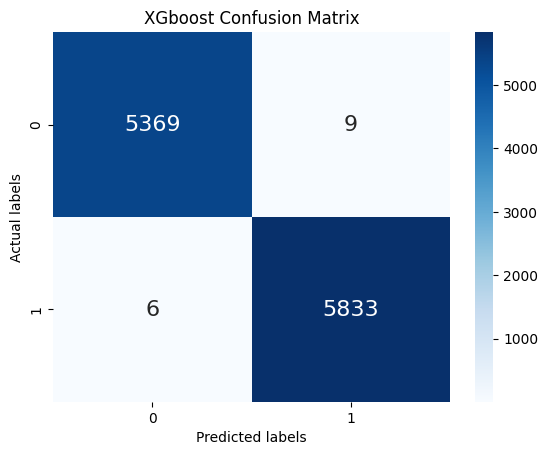

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('XGboost Confusion Matrix')

# Display the plot
plt.show()

In [45]:
print(X_test_bow)

  (0, 252)	2
  (0, 298)	1
  (0, 358)	2
  (0, 361)	1
  (0, 362)	1
  (0, 364)	1
  (0, 430)	2
  (0, 438)	2
  (0, 442)	1
  (0, 854)	1
  (0, 855)	1
  (0, 1081)	1
  (0, 1174)	1
  (0, 1175)	1
  (0, 1179)	1
  (0, 1231)	1
  (0, 1232)	1
  (0, 1357)	1
  (0, 1585)	4
  (0, 1587)	4
  (0, 1702)	2
  (0, 1716)	1
  (0, 1721)	1
  (0, 1819)	1
  (0, 1886)	2
  :	:
  (11216, 4751)	4
  (11216, 4758)	1
  (11216, 4763)	1
  (11216, 4772)	1
  (11216, 4780)	1
  (11216, 4782)	1
  (11216, 4803)	1
  (11216, 4814)	1
  (11216, 4821)	1
  (11216, 4825)	2
  (11216, 4833)	3
  (11216, 4835)	1
  (11216, 4848)	1
  (11216, 4851)	1
  (11216, 4861)	1
  (11216, 4868)	5
  (11216, 4892)	3
  (11216, 4915)	1
  (11216, 4926)	1
  (11216, 4934)	1
  (11216, 4939)	1
  (11216, 4941)	2
  (11216, 4943)	2
  (11216, 4977)	2
  (11216, 4979)	1


**Prediction**

In [46]:
X_predict = X_test_bow[1]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


In [47]:
X_predict = X_test_bow[15]

prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


# **Support Vector Machine**

In [48]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [49]:
start_time_svm_training = time.time()

random_search.fit(X_train_bow, y_train)

end_time_svm_training = time.time()
elapsed_time_svm_training = end_time_svm_training - start_time_svm_training

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [50]:
print(f"Time taken: {elapsed_time_svm_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 5790.8177807331085 seconds
Best Parameters:  {'C': 1.1170220047025738, 'kernel': 'linear'}
Best Accuracy:  0.9960772659732541


In [51]:
start_time_svm_testing = time.time()

X_test_bow = bag_of_words.transform(X_test)
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Support Vector Machine :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))


end_time_svm_testing = time.time()
elapsed_time_svm_testing = end_time_svm_testing - start_time_svm_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_svm_testing} seconds")

Accuracy score for Support Vector Machine : 0.9967014353213872

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5378
           1       1.00      1.00      1.00      5839

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 42.85152983665466 seconds


Confusion Matrix:
[[5358   20]
 [  17 5822]]


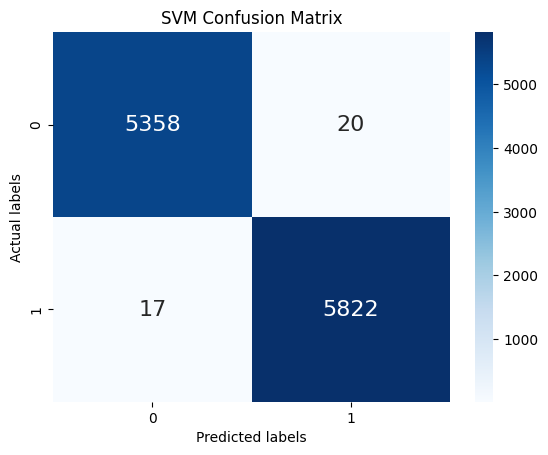

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('SVM Confusion Matrix')

# Display the plot
plt.show()

In [53]:
print(X_test_bow)

  (0, 252)	2
  (0, 298)	1
  (0, 358)	2
  (0, 361)	1
  (0, 362)	1
  (0, 364)	1
  (0, 430)	2
  (0, 438)	2
  (0, 442)	1
  (0, 854)	1
  (0, 855)	1
  (0, 1081)	1
  (0, 1174)	1
  (0, 1175)	1
  (0, 1179)	1
  (0, 1231)	1
  (0, 1232)	1
  (0, 1357)	1
  (0, 1585)	4
  (0, 1587)	4
  (0, 1702)	2
  (0, 1716)	1
  (0, 1721)	1
  (0, 1819)	1
  (0, 1886)	2
  :	:
  (11216, 4751)	4
  (11216, 4758)	1
  (11216, 4763)	1
  (11216, 4772)	1
  (11216, 4780)	1
  (11216, 4782)	1
  (11216, 4803)	1
  (11216, 4814)	1
  (11216, 4821)	1
  (11216, 4825)	2
  (11216, 4833)	3
  (11216, 4835)	1
  (11216, 4848)	1
  (11216, 4851)	1
  (11216, 4861)	1
  (11216, 4868)	5
  (11216, 4892)	3
  (11216, 4915)	1
  (11216, 4926)	1
  (11216, 4934)	1
  (11216, 4939)	1
  (11216, 4941)	2
  (11216, 4943)	2
  (11216, 4977)	2
  (11216, 4979)	1


**Prediction**

In [54]:
X_predict = X_test_bow[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [55]:
X_predict = X_test_bow[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **ROC Graph**

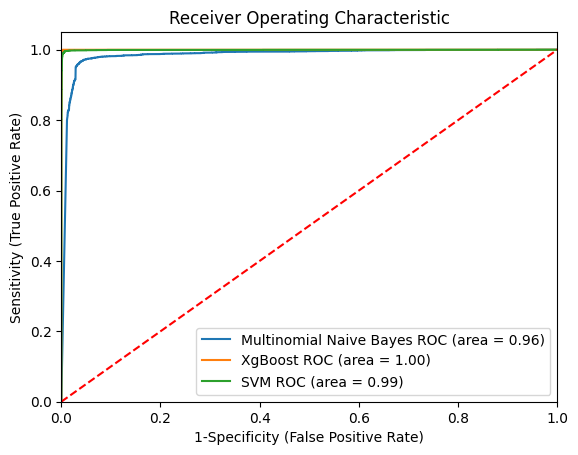

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'Multinomial Naive Bayes',
        'model': MultinomialNB(),
    },
    {
        'label': 'XgBoost',
        'model': xgb.XGBClassifier(),
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),  # Set probability=True for SVC
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']  # select the model
    model.fit(X_train_bow, y_train)  # train the model
    y_pred = model.predict(X_test_bow)  # predict the test data

    # Compute False positive rate, and True positive rate
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_bow)[:, 1])
    else:
        # For models that don't have predict_proba, use decision function
        decision_values = model.decision_function(X_test_bow)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_values)

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  # Display

# **Comparing the training time and testing among selected models**

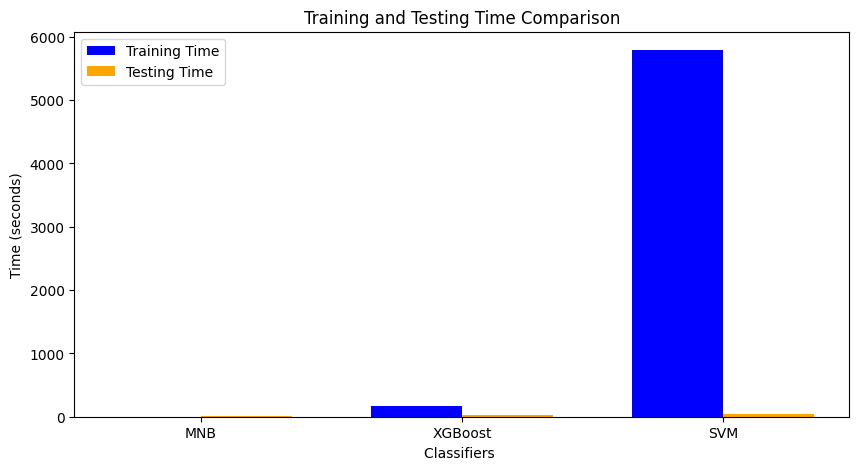

In [57]:
import matplotlib.pyplot as plt
import numpy as np

models = ['MNB', 'XGBoost', 'SVM']
training_times = [elapsed_time_MNB_training, elapsed_time_xgb_training, elapsed_time_svm_training]  # Replace with actual training times in seconds
testing_times = [elapsed_time_MNB_testing,elapsed_time_xgb_testing,elapsed_time_svm_testing]      # Replace with actual testing times in seconds

# Plotting both training and testing times in the same plot
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 5))
plt.bar(index, training_times, width=bar_width, color='blue', label='Training Time')
plt.bar(index + bar_width, testing_times, width=bar_width, color='orange', label='Testing Time')
plt.xlabel('Classifiers ')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()